In [ ]:

# Residual square sum = Mean squared error -  (sum(error diff)^2)/n - squared because it is differentiable

# Average model

# R square - coefficient of determination = (1- SS residual)/ (SS total (average model))

In [ ]:
# MODEL INTERPRETABILITY

In [66]:
# FROM PREVIOUS CLASS


import datetime as dt
import pandas as pd
import sklearn
import numpy as np
import seaborn as sns

# Preprocessing

df_car=pd.read_csv(r"C:\Users\28962\Documents\GitHub\DSML\13_intro_to_ml_nn\13.2_intro_to_ml_ml_linear_regression_1\cars24-car-price-cleaned.csv")

def target_encoding(df,tar,var):
    df[var]=df.groupby([var])[tar].transform('mean')
    return df

target_encoding(df_car,'selling_price','make')
target_encoding(df_car,'selling_price','model')

# scaling
import sklearn.linear_model
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

df_car_scaled=pd.DataFrame(scaler.fit_transform(df_car),columns=df_car.columns)

# splitting

from sklearn.model_selection import train_test_split

y=df_car_scaled['selling_price']
x=df_car_scaled.drop('selling_price',axis=1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

# Training

from sklearn.linear_model import LinearRegression

lm=LinearRegression()

lm.fit(x_train,y_train)

print(lm.score(x_train,y_train))
print(lm.score(x_test,y_test))

0.9458936000772378
0.9459830232581433


<Axes: xlabel='feature', ylabel='coeff'>

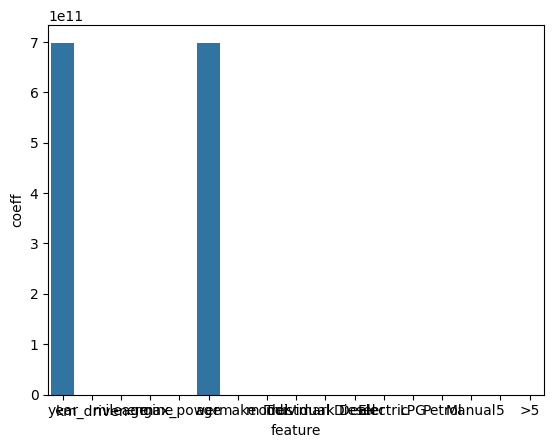

In [70]:
# Feature importance
df_coeff=pd.DataFrame({'feature':x_train.columns,'coeff':lm.coef_})

# most important feature:
df_coeff.loc[df_coeff['coeff']==(df_coeff["coeff"].max())]

# least important feature:
df_coeff.loc[df_coeff['coeff']==(df_coeff["coeff"].min())]

# barplot

sns.barplot(x='feature',y='coeff',data=df_coeff)


